# Выводы

1. лучше собирать разметку как можно чаще, а затем склеить и ещё раз нарзать
2. возможно лучше снять все ограничения с arduino


In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import euclidean
from scipy.signal import argrelmin, argrelmax
import scipy.fftpack as scfft

In [39]:
datasets_folder = "../datasets/"

In [40]:
dataset_3 = pd.read_csv(datasets_folder + "dataset_3.csv", index_col=0)
dataset_3.head()

,palmBase_x,palmBase_y,palmBase_z,thumb1_x,thumb1_y,thumb1_z,thumb2_x,thumb2_y,thumb2_z,thumb3_x,...,e90,e91,e92,e93,e94,e95,e96,e97,e98,e99
0,80.420688,377.592438,-0.001548,149.374880,356.297949,-4.103198,202.565372,301.797479,-5.569788,241.844779,...,422.0,416.0,415.0,423.0,423.0,417.0,405.0,412.0,411.0,403.0
1,110.621197,362.817404,-0.000964,171.488353,344.784483,-13.536230,213.545279,290.563742,-15.920309,197.287569,...,374.0,381.0,382.0,377.0,374.0,379.0,385.0,378.0,381.0,385.0
2,133.831678,344.170393,-0.000395,189.777625,353.152273,-0.150721,237.681508,317.246519,0.195653,266.015525,...,396.0,400.0,400.0,394.0,393.0,399.0,394.0,390.0,0.0,0.0
3,128.460390,350.709933,-0.001713,181.869894,352.623052,-15.213146,233.693253,320.682299,-24.862064,270.661270,...,369.0,369.0,362.0,359.0,366.0,366.0,359.0,357.0,359.0,366.0
4,101.490308,363.238240,-0.001209,159.770137,359.100482,-4.726096,216.348269,322.170790,-7.722144,263.068047,...,397.0,400.0,393.0,390.0,395.0,399.0,394.0,390.0,391.0,398.0


In [41]:
dataset_1 = pd.read_csv(datasets_folder + "dataset.csv", index_col=0)
# dataset_1.head()
dataset_2 = pd.read_csv(datasets_folder + "dataset_2.csv", index_col=0)
# dataset_1.head()

In [42]:
dataset_1.columns[:65]

Index(['palmBase_x', 'palmBase_y', 'palmBase_z', 'thumb1_x', 'thumb1_y',
       'thumb1_z', 'thumb2_x', 'thumb2_y', 'thumb2_z', 'thumb3_x', 'thumb3_y',
       'thumb3_z', 'thumb4_x', 'thumb4_y', 'thumb4_z', 'indexFinger1_x',
       'indexFinger1_y', 'indexFinger1_z', 'indexFinger2_x', 'indexFinger2_y',
       'indexFinger2_z', 'indexFinger3_x', 'indexFinger3_y', 'indexFinger3_z',
       'indexFinger4_x', 'indexFinger4_y', 'indexFinger4_z', 'middleFinger1_x',
       'middleFinger1_y', 'middleFinger1_z', 'middleFinger2_x',
       'middleFinger2_y', 'middleFinger2_z', 'middleFinger3_x',
       'middleFinger3_y', 'middleFinger3_z', 'middleFinger4_x',
       'middleFinger4_y', 'middleFinger4_z', 'ringFinger1_x', 'ringFinger1_y',
       'ringFinger1_z', 'ringFinger2_x', 'ringFinger2_y', 'ringFinger2_z',
       'ringFinger3_x', 'ringFinger3_y', 'ringFinger3_z', 'ringFinger4_x',
       'ringFinger4_y', 'ringFinger4_z', 'pinky1_x', 'pinky1_y', 'pinky1_z',
       'pinky2_x', 'pinky2_y', 'pinky2_

In [43]:
dataset_3.describe()

,palmBase_x,palmBase_y,palmBase_z,thumb1_x,thumb1_y,thumb1_z,thumb2_x,thumb2_y,thumb2_z,thumb3_x,...,e90,e91,e92,e93,e94,e95,e96,e97,e98,e99
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,...,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.00000,53.000000,53.000000,53.000000
mean,105.267794,357.668579,-0.001083,168.113927,353.589463,-9.140111,218.511766,313.391584,-11.243295,237.321238,...,359.301887,351.245283,343.377358,342.754717,343.320755,343.660377,336.90566,336.245283,328.735849,313.660377
std,9.623281,11.772287,0.000435,8.465594,4.857181,7.515178,7.393827,8.609134,11.618435,23.814688,...,118.137564,127.682585,136.077357,135.860492,136.135929,136.271638,144.12338,143.858759,150.828246,162.621427
min,80.420688,324.342434,-0.001874,149.374880,340.859610,-21.470606,202.565372,290.563742,-30.675484,197.287569,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,100.315229,354.177810,-0.001400,162.546016,351.187221,-15.026034,213.270798,308.014301,-18.811329,213.029785,...,384.000000,382.000000,382.000000,381.000000,379.000000,383.000000,384.00000,378.000000,377.000000,370.000000
50%,104.816245,360.614632,-0.001104,167.227809,354.157348,-10.491909,218.748884,315.668606,-14.071639,243.438143,...,396.000000,393.000000,393.000000,393.000000,395.000000,393.000000,394.00000,393.000000,393.000000,392.000000
75%,110.749784,363.238240,-0.000926,173.932196,356.491361,-5.058350,222.380392,319.253614,-6.770664,257.251286,...,401.000000,402.000000,403.000000,403.000000,402.000000,402.000000,402.00000,403.000000,400.000000,399.000000
max,133.831678,394.656430,-0.000077,189.777625,364.072266,18.695902,237.681508,330.102315,37.532558,271.963943,...,448.000000,451.000000,445.000000,442.000000,445.000000,449.000000,448.00000,439.000000,445.000000,443.000000


In [44]:
anotations_short = {
            -1: "palmBase",
            0: "thumb",
            1: "indexFinger",
            2: "middleFinger",
            3: "ringFinger",
            4: "pinky"
        }


In [45]:
def get_hand_data(ds):
    palmBase_x = ds.palmBase_x.tolist()
    palmBase_y = ds.palmBase_y.tolist()
    thumb_x = ds.thumb4_x.tolist()
    thumb_y = ds.thumb4_y.tolist()
    indexFinger_x = ds.indexFinger4_x.tolist()
    indexFinger_y = ds.indexFinger4_y.tolist()
    middleFinger_x = ds.middleFinger4_x.tolist()
    middleFinger_y = ds.middleFinger4_y.tolist()
    ringFinger_x = ds.ringFinger4_x.tolist()
    ringFinger_y = ds.ringFinger4_y.tolist()
    pinky_x = ds.pinky4_x.tolist()
    pinky_y = ds.pinky4_y.tolist()
    return palmBase_x,palmBase_y, thumb_x,thumb_y, indexFinger_x,indexFinger_y, middleFinger_x,middleFinger_y, ringFinger_x,ringFinger_y, pinky_x,pinky_y


In [265]:
dataset_1["indexFinger4_x"]

0      373.324854
1      419.235623
2      422.448376
3      314.861345
4      290.282230
          ...    
124    210.437385
125    237.678901
126    262.696099
127    262.426274
128    284.959877
Name: indexFinger4_x, Length: 129, dtype: float64

In [266]:
def get_hand_data_number(ds, number=4):
    palmBase_x = ds.palmBase_x.tolist()
    palmBase_y = ds.palmBase_y.tolist()
    thumb_x = ds["thumb"+str(number)+"_x"].tolist()
    thumb_y = ds["thumb"+str(number)+"_y"].tolist()
    indexFinger_x = ds["indexFinger"+str(number)+"_x"].tolist()
    indexFinger_y = ds["indexFinger"+str(number)+"_y"].tolist()
    middleFinger_x = ds["middleFinger"+str(number)+"_x"].tolist()
    middleFinger_y = ds["middleFinger"+str(number)+"_y"].tolist()
    ringFinger_x = ds["ringFinger"+str(number)+"_x"].tolist()
    ringFinger_y = ds["ringFinger"+str(number)+"_y"].tolist()
    pinky_x = ds["pinky"+str(number)+"_x"].tolist()
    pinky_y = ds["pinky"+str(number)+"_y"].tolist()
    return palmBase_x,palmBase_y, thumb_x,thumb_y, indexFinger_x,indexFinger_y, middleFinger_x,middleFinger_y, ringFinger_x,ringFinger_y, pinky_x,pinky_y


In [46]:
pb_1_x,pb_1_y,  t_1_x,t_1_y,  if_1_x,if_1_y,  mf_1_x,mf_1_y,  rf_1_x,rf_1_y,  pf_1_x, pf_1_y = get_hand_data(dataset_1)

In [47]:
pb_2_x,pb_2_y,  t_2_x,t_2_y,  if_2_x,if_2_y,  mf_2_x,mf_2_y,  rf_2_x,rf_2_y,  pf_2_x, pf_2_y = get_hand_data(dataset_2)

In [48]:
palmBase_x = dataset_3.palmBase_x.tolist()
palmBase_y = dataset_3.palmBase_y.tolist()
thumb_x = dataset_3.thumb4_x.tolist()
thumb_y = dataset_3.thumb4_y.tolist()
indexFinger_x = dataset_3.indexFinger4_x.tolist()
indexFinger_y = dataset_3.indexFinger4_y.tolist()
middleFinger_x = dataset_3.middleFinger4_x.tolist()
middleFinger_y = dataset_3.middleFinger4_y.tolist()
ringFinger_x = dataset_3.ringFinger4_x.tolist()
ringFinger_y = dataset_3.ringFinger4_y.tolist()
pinky_x = dataset_3.pinky4_x.tolist()
pinky_y = dataset_3.pinky4_y.tolist()


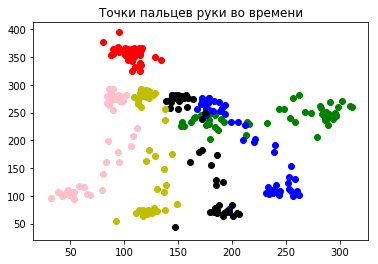

In [49]:
plt.scatter(palmBase_x, palmBase_y, c="r")
plt.scatter(thumb_x, thumb_y, c="g")
plt.scatter(indexFinger_x, indexFinger_y, c="blue")
plt.scatter(middleFinger_x, middleFinger_y, c="black")
plt.scatter(ringFinger_x, ringFinger_y, c="y")
plt.scatter(pinky_x, pinky_y, c="pink")

# plt.savefig("Base_finger_end.jpg")
plt.title("Точки пальцев руки во времени")
plt.show()

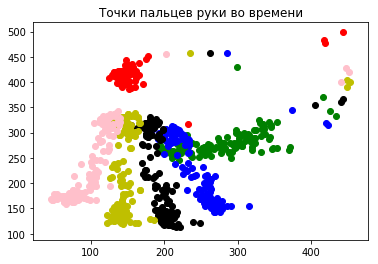

In [50]:
plt.scatter(pb_1_x, pb_1_y, c="r")
plt.scatter(t_1_x, t_1_y, c="g")
plt.scatter(if_1_x, if_1_y, c="blue")
plt.scatter(mf_1_x, mf_1_y, c="black")
plt.scatter(rf_1_x, rf_1_y, c="y")
plt.scatter(pf_1_x, pf_1_y, c="pink")

# plt.savefig("Base_finger_end.jpg")
plt.title("Точки пальцев руки во времени")
plt.show()

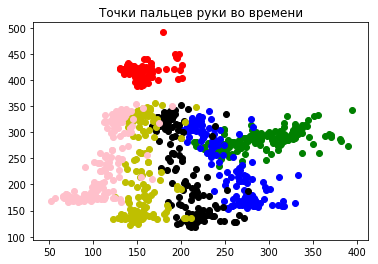

In [51]:
plt.scatter(pb_2_x, pb_2_y, c="r")
plt.scatter(t_2_x, t_2_y, c="g")
plt.scatter(if_2_x, if_2_y, c="blue")
plt.scatter(mf_2_x, mf_2_y, c="black")
plt.scatter(rf_2_x, rf_2_y, c="y")
plt.scatter(pf_2_x, pf_2_y, c="pink")

# plt.savefig("Base_finger_end.jpg")
plt.title("Точки пальцев руки во времени")
plt.show()

In [52]:
# euclidean([palmBase_x[0], palmBase_y[0]], [indexFinger_x[0], indexFinger_y[0]])
bending_dist_base_indexFinger = []
bending_dist_base_thumb = []
bending_dist_base_middleFinger = []
bending_dist_base_ringFinger = []
bending_dist_base_pinky = []

for i in range(len(palmBase_x)):
    bending_dist_base_indexFinger.append(euclidean([palmBase_x[i], palmBase_y[i]], [indexFinger_x[i], indexFinger_y[i]]))
    bending_dist_base_thumb.append(euclidean([palmBase_x[i], palmBase_y[i]], [thumb_x[i], thumb_y[i]]))
    bending_dist_base_middleFinger.append(euclidean([palmBase_x[i], palmBase_y[i]], [middleFinger_x[i], middleFinger_y[i]]))
    bending_dist_base_ringFinger.append(euclidean([palmBase_x[i], palmBase_y[i]], [ringFinger_x[i], ringFinger_y[i]]))
    bending_dist_base_pinky.append(euclidean([palmBase_x[i], palmBase_y[i]], [pinky_x[i], pinky_y[i]]))
    
    

In [53]:
def get_dist_base_index(base_x, base_y, indexFinger_x, indexFinger_y):
    base_indexFinger = []
    for i in range(len(base_x)):
        base_indexFinger.append( euclidean([base_x[i], base_y[i]], [indexFinger_x[i], indexFinger_y[i]]) )
    return base_indexFinger

In [54]:
bending_dist_b1_if1 = get_dist_base_index(pb_1_x, pb_1_y, if_1_x, if_1_y)
bending_dist_b2_if2 = get_dist_base_index(pb_2_x, pb_2_y, if_2_x, if_2_y)

# bending_dist_b1_if1

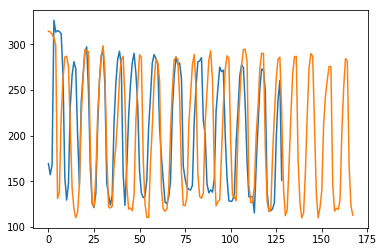

In [55]:
plt.plot(bending_dist_b1_if1)
plt.plot(bending_dist_b2_if2)
plt.show()

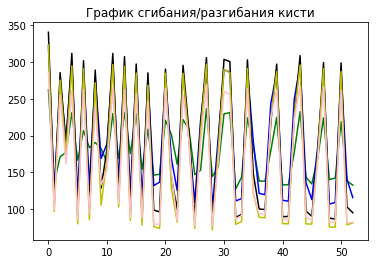

In [56]:
plt.plot(bending_dist_base_thumb, c="g")
plt.plot(bending_dist_base_indexFinger, c="blue")
plt.plot(bending_dist_base_middleFinger, c="black")
plt.plot(bending_dist_base_ringFinger, c="y")
plt.plot(bending_dist_base_pinky, c="pink")
plt.title("График сгибания/разгибания кисти")
plt.show()
# plt.savefig("Bending_grah.jpg")

In [57]:
signals = []
def collect_signals(data_frame, amount=100,  prefix="e"):
    result = data_frame.loc[:,'e0':'e'+str(amount-1)]
    return result.to_numpy()

In [58]:
signals = collect_signals(dataset_3, amount=100)
signals_1 = collect_signals(dataset_1, amount=100)
signals_2 = collect_signals(dataset_2, amount=100)


In [254]:
hand_1 = get_hand_data(dataset_1)

In [59]:
def concat_signals(data):
    result = []
    for i, batch in enumerate(data):
        try:
            first_zero_index = list(batch).index(0)
        except:
            first_zero_index = -1
        for r in batch[:first_zero_index]:
            result.append(r)
    return result

def concat_signals_lables(data, lables_data, bias=400):
    result = []
    lables_res = []
    for i, batch in enumerate(data):
        try:
            first_zero_index = list(batch).index(0)
        except:
            first_zero_index = -1
        for r in batch[:first_zero_index]:
            lables_res.append((lables_data[i] * 50) + bias)
            result.append(r)
    return result, lables_res

def concat_signals_lables_ground(data, lables_data):
    result = []
    lables_res = []
    for i, batch in enumerate(data):
        try:
            first_zero_index = list(batch).index(0)
        except:
            first_zero_index = -1
        for r in batch[:first_zero_index]:
            lables_res.append(lables_data[i])
            result.append(r)
    return result, lables_res

In [60]:
def is_bend(data_bend, threshold=200, bias=25):
    result = []
    for d in data_bend:
#         result.append(d > threshold)
        if d > (threshold + bias):
            result.append(1)
        elif d < (threshold - bias):
            result.append(-1)
        else:
            result.append(0)
    return result

In [61]:
def get_bend_not_bend_index_lables(lables_data, bias=0): #not ground
    current = lables_data[0]
    start = 0
    left_bias = 0
    right_bias = bias
    bend_index = []
    not_bend_index = []
    for i,each in enumerate(lables_data[1:]):
        if each != current:
            if (len(lables_data[1:]) - i) < bias:
                right_bias = 0
            if each > current:
                not_bend_index.append((start - left_bias, i + right_bias))
            else:
                bend_index.append((start - left_bias, i + right_bias))
            start = i
            left_bias = bias
        current = each
    return bend_index, not_bend_index

In [186]:
def get_bend_indexes_lables(lables_data, bias=0): #not ground
    current = lables_data[0]
    start = 0
    left_bias = 0
    right_bias = bias
    bend_indexes = []
    for i,each in enumerate(lables_data[1:]):
        if each != current:
            if (len(lables_data[1:]) - i) < bias:
                right_bias = 0
            bend_indexes.append((start - left_bias, i + right_bias, current))
            start = i
            left_bias = bias
        current = each
    return bend_indexes

In [193]:
def create_bend_batches(signal_full, bend_index):
    signal_bend_batches = []
    for each in bend_index:
        d = signal_full[each[0] : each[1]]
        signal_bend_batches.append(d)
    return signal_bend_batches

def create_bend_batches_regression(signal_full, bend_index):
    signal_bend_batches = []
    for each in bend_index:
        d = signal_full[each[0] : each[1]]
        signal_bend_batches.append(d + [each[2] ])
    return signal_bend_batches

def norm_batches_length(signal_batches, length, na_value=-1, pass_lower=True):
    res = []
    for each in signal_batches:
        if pass_lower:
            d = each[:length]
            res.append(d + [na_value] * (length - len(d)))
        else:
            if len(each) >= length:
                d = each[:length]
                res.append(d)
    return res

def create_binary_dataset(signal_full, bend_index, not_bend_index, batch_len, bend_label=1, not_bend_label=0, pass_lower=True):
    # pandas dataset creation 
    signal_bend_batches = create_bend_batches(signal_full, bend_index)
    signal_not_bend_batches = create_bend_batches(signal_full, not_bend_index)
    signal_bend_batches = norm_batches_length(signal_bend_batches, batch_len, pass_lower=pass_lower)
    signal_not_bend_batches = norm_batches_length(signal_not_bend_batches, batch_len, pass_lower=pass_lower)
    to_df = []
    for batch in signal_bend_batches:
        to_df.append(batch + [bend_label])
    for batch in signal_not_bend_batches:
        to_df.append(batch + [not_bend_label])
    column_names = ["e_"+str(i) for i in range(batch_len)]
    column_names.append("label")    
    df = pd.DataFrame(to_df ,columns=column_names)
    return df


def create_regression_dataset(signal_full, bend_indexes, batch_len, pass_lower=True):
    signal_bend_batches = create_bend_batches_regression(signal_full, bend_indexes)
    lables = [i[-1] for i in signal_bend_batches]
    signal_bend_batches = norm_batches_length(signal_bend_batches[:-1], batch_len, pass_lower=pass_lower)
    

def create_ternary_dataset(signal_full, bend_indexes, batch_len, pass_lower=True):
    signal_bend_batches = create_bend_batches_regression(signal_full, bend_indexes)
    lables = [i[-1] for i in signal_bend_batches]
    signal_bend_batches = norm_batches_length(signal_bend_batches[:-1], batch_len, pass_lower=pass_lower)
    column_names = ["e_"+str(i) for i in range(batch_len)]
    column_names.append("label")    
    df = pd.DataFrame(to_df ,columns=column_names)
    return df
    
    

In [194]:
bend_ds1 = is_bend(bending_dist_b1_if1, bias=0)
big_signal_1, big_label_1 = concat_signals_lables(signals_1, bend_ds1, 280)
big_signal_1, big_label_1_ground = concat_signals_lables_ground(signals_1, bending_dist_b1_if1)


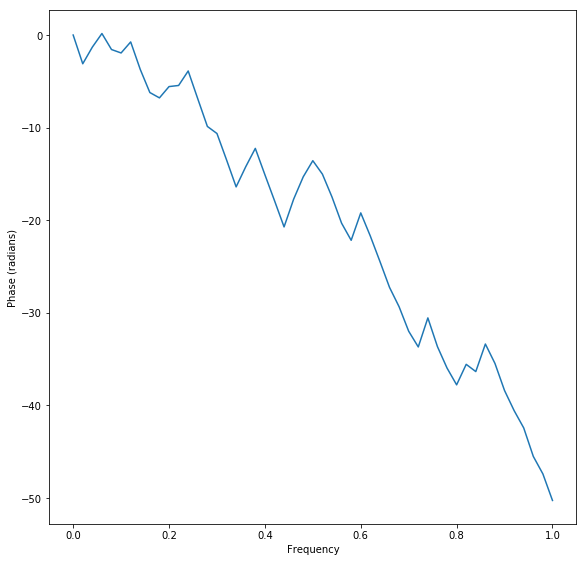

In [231]:
plt.phase_spectrum(signals_1[3])
plt.show()

In [195]:
tmp = get_bend_indexes_lables(big_label_1_ground, 10)


In [196]:
tmp_val = [i[2] for i in tmp]


In [197]:
batches_regression = create_bend_batches_regression(big_signal_1, tmp)

In [209]:
len(np.array([1,2,3]))

3

In [238]:
import pywt

In [244]:
wavelet = pywt.dwt(batches_regression[0][:-1], 'db1')

In [249]:
wavelet

(array([393.15137034, 387.49451609, 376.88791437, 408.70771953,
        370.52395334, 393.15137034, 403.75797206, 371.9381669 ,
        394.5655839 , 407.29350596, 378.30212793, 389.61583643,
        404.46507884, 377.59502115, 403.05086528, 371.9381669 ,
        406.58639918, 374.05948725, 404.46507884, 383.95898218,
        396.68690425, 388.20162287, 369.81684656, 379.7163415 ,
        354.26049737, 380.42344828, 371.23106012, 354.96760416,
        344.36100244, 358.50313806, 325.97622613, 339.41125497,
        347.89653634, 335.87572106, 354.26049737, 327.39043969,
        334.4615075 , 357.0889245 , 326.68333291, 346.48232278,
        368.402633  , 346.48232278, 347.89653634, 382.54476862,
        365.57420587, 400.92954493, 379.7163415 , 402.3437585 ,
        406.58639918, 430.62802974, 463.86204846, 474.46865018,
        442.64884502, 468.81179593]),
 array([-14.14213562, -15.55634919,  -6.36396103,  -1.41421356,
          1.41421356,  -8.48528137,   7.77817459,   1.41421356,
  

0.84375


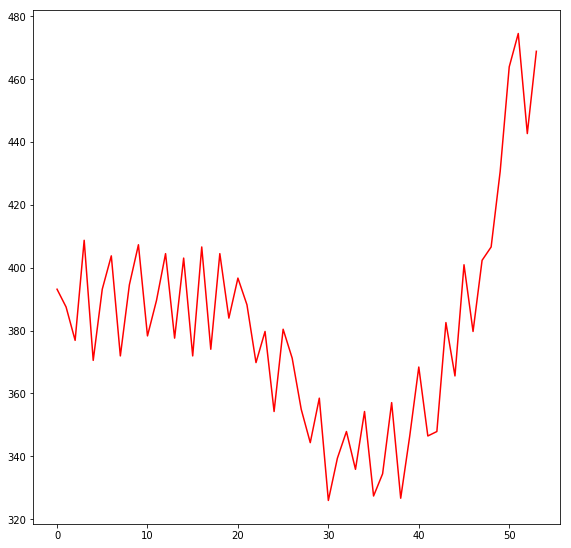

In [251]:
avg = 0
sampling_rate = 100
for each in batches_regression[:1]:
    avg += len(each[:-1])
    wavelet = pywt.dwt(each[:-1], 'db1')
    plt.plot(wavelet[0], 'r')
#     plt.plot(each[:-1], 'b')
print(avg/len(batches_regression))
plt.show()


In [322]:
import numpy

def smooth(x,window_len=11,window='hanning'):
    if x.ndim != 1:
        raise (ValueError, "smooth only accepts 1 dimension arrays.")

    if x.size < window_len:
        raise(ValueError, "Input vector needs to be bigger than window size.")


    if window_len<3:
        return x


    if not window in ['flat', 'hanning', 'hamming', 'bartlett', 'blackman']:
        raise (ValueError, "Window is on of 'flat', 'hanning', 'hamming', 'bartlett', 'blackman'")


    s=numpy.r_[x[window_len-1:0:-1],x,x[-2:-window_len-1:-1]]
    #print(len(s))
    if window == 'flat': #moving average
        w=numpy.ones(window_len,'d')
    else:
        w=eval('numpy.'+window+'(window_len)')

    y=numpy.convolve(w/w.sum(),s,mode='valid')
    return y

In [275]:
anot_get_hand = [
    'palmBase_x','palmBase_y', 
    'thumb_x','thumb_y', 
    'indexFinger_x','indexFinger_y', 
    'middleFinger_x','middleFinger_y', 
    'ringFinger_x','ringFinger_y', 
    'pinky_x','pinky_y'
]

In [279]:
hand_1_1[2][0]

451.1668335849757

In [268]:
hand_1_1 = get_hand_data_number(dataset_1, 1) # фаланга 1
hand_1_2 = get_hand_data_number(dataset_1, 2) # фаланга 2
hand_1_3 = get_hand_data_number(dataset_1, 3) # фаланга 3
hand_1_4 = get_hand_data_number(dataset_1, 4) # фаланга 4

3.4296875


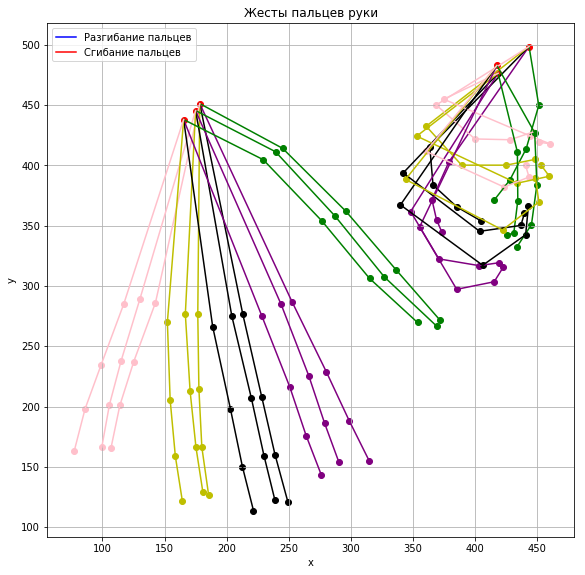

In [455]:
avg = 0
b_5 = []
start = 0
end = 6
fig, ax = plt.subplots()

for i in range(start, end):
    ax.scatter(pb_1_x[i], pb_1_y[i], c="r")
    
    ax.scatter(hand_1_1[2][i], hand_1_1[3][i], c="g")
    ax.scatter(hand_1_2[2][i], hand_1_2[3][i], c="g")
    ax.scatter(hand_1_3[2][i], hand_1_3[3][i], c="g")
    ax.scatter(hand_1_4[2][i], hand_1_4[3][i], c="g")
    ax.plot(
        [ pb_1_x[i], hand_1_1[2][i] ],
        [ pb_1_y[i], hand_1_1[3][i] ], 
        "g")
    ax.plot(
        [ hand_1_1[2][i], hand_1_2[2][i]],
        [ hand_1_1[3][i], hand_1_2[3][i] ], 
        "g")
    ax.plot(
        [ hand_1_2[2][i], hand_1_3[2][i]],
        [ hand_1_2[3][i], hand_1_3[3][i] ], 
        "g")
    ax.plot(
        [ hand_1_3[2][i], hand_1_4[2][i]],
        [ hand_1_3[3][i], hand_1_4[3][i] ], 
        "g")
    
    
    ax.scatter(hand_1_1[4][i], hand_1_1[5][i], c="purple")
    ax.scatter(hand_1_2[4][i], hand_1_2[5][i], c="purple")
    ax.scatter(hand_1_3[4][i], hand_1_3[5][i], c="purple")
    ax.scatter(hand_1_4[4][i], hand_1_4[5][i], c="purple")
    ax.plot(
        [ pb_1_x[i], hand_1_1[4][i] ],
        [ pb_1_y[i], hand_1_1[5][i] ], 
        "purple")
    ax.plot(
        [ hand_1_1[4][i], hand_1_2[4][i]],
        [ hand_1_1[5][i], hand_1_2[5][i] ], 
        "purple")
    ax.plot(
        [ hand_1_2[4][i], hand_1_3[4][i]],
        [ hand_1_2[5][i], hand_1_3[5][i] ], 
        "purple")
    ax.plot(
        [ hand_1_3[4][i], hand_1_4[4][i]],
        [ hand_1_3[5][i], hand_1_4[5][i] ], 
        "purple")
    
    ax.scatter(hand_1_1[6][i], hand_1_1[7][i], c="black")
    ax.scatter(hand_1_2[6][i], hand_1_2[7][i], c="black")
    ax.scatter(hand_1_3[6][i], hand_1_3[7][i], c="black")
    ax.scatter(hand_1_4[6][i], hand_1_4[7][i], c="black")
    ax.plot(
        [ pb_1_x[i], hand_1_1[6][i] ],
        [ pb_1_y[i], hand_1_1[7][i] ], 
        "black")
    ax.plot(
        [ hand_1_1[6][i], hand_1_2[6][i]],
        [ hand_1_1[7][i], hand_1_2[7][i] ], 
        "black")
    ax.plot(
        [ hand_1_2[6][i], hand_1_3[6][i]],
        [ hand_1_2[7][i], hand_1_3[7][i] ], 
        "black")
    ax.plot(
        [ hand_1_3[6][i], hand_1_4[6][i]],
        [ hand_1_3[7][i], hand_1_4[7][i] ], 
        "black")
    
    ax.scatter(hand_1_1[8][i], hand_1_1[9][i], c="y")
    ax.scatter(hand_1_2[8][i], hand_1_2[9][i], c="y")
    ax.scatter(hand_1_3[8][i], hand_1_3[9][i], c="y")
    ax.scatter(hand_1_4[8][i], hand_1_4[9][i], c="y")
    ax.plot(
        [ pb_1_x[i], hand_1_1[8][i] ],
        [ pb_1_y[i], hand_1_1[9][i] ], 
        "y")
    ax.plot(
        [ hand_1_1[8][i], hand_1_2[8][i]],
        [ hand_1_1[9][i], hand_1_2[9][i] ], 
        "y")
    ax.plot(
        [ hand_1_2[8][i], hand_1_3[8][i]],
        [ hand_1_2[9][i], hand_1_3[9][i] ], 
        "y")
    ax.plot(
        [ hand_1_3[8][i], hand_1_4[8][i]],
        [ hand_1_3[9][i], hand_1_4[9][i] ], 
        "y")
    
    ax.scatter(hand_1_1[10][i], hand_1_1[11][i], c="pink")
    ax.scatter(hand_1_2[10][i], hand_1_2[11][i], c="pink")
    ax.scatter(hand_1_3[10][i], hand_1_3[11][i], c="pink")
    ax.scatter(hand_1_4[10][i], hand_1_4[11][i], c="pink")
    ax.plot(
        [ pb_1_x[i], hand_1_1[10][i] ],
        [ pb_1_y[i], hand_1_1[11][i] ], 
        "pink")
    ax.plot(
        [ hand_1_1[10][i], hand_1_2[10][i]],
        [ hand_1_1[11][i], hand_1_2[11][i] ], 
        "pink")
    ax.plot(
        [ hand_1_2[10][i], hand_1_3[10][i]],
        [ hand_1_2[11][i], hand_1_3[11][i] ], 
        "pink")
    ax.plot(
        [ hand_1_3[10][i], hand_1_4[10][i]],
        [ hand_1_3[11][i], hand_1_4[11][i] ], 
        "pink")
    
#     plt.scatter(t_1_x[i], t_1_y[i], c="g")
#     plt.scatter(if_1_x[i], if_1_y[i], c="blue")
#     plt.scatter(mf_1_x[i], mf_1_y[i], c="black")
#     plt.scatter(rf_1_x[i], rf_1_y[i], c="y")
#     plt.scatter(pf_1_x[i], pf_1_y[i], c="pink")
    avg += len(batches_regression[i][:-1])
#     plt.plot(batches_regression[i][:-1])
print(avg/len(batches_regression))
ax.grid()
ax.set_xlabel('x')
ax.set_ylabel('y')

    
label_1 = "Разгибание пальцев"
label_2 = "Сгибание пальцев"
ax.plot(pb_1_x[0], pb_1_y[0], "b", label=label_1)
ax.plot(pb_1_x[0], pb_1_y[0], "r", label=label_2)
ax.legend()
plt.title("Жесты пальцев руки")
plt.savefig("hands_coords.jpg")
plt.show()

In [365]:
# avg = 0
# b_5 = []
# start = 1
# end = 6
# for i in range(start, end):
#     plt.scatter(pb_1_x[i], pb_1_y[i], c="r")
    
#     plt.scatter(hand_1_1[6][i], hand_1_1[7][i], c="black")
#     plt.scatter(hand_1_2[6][i], hand_1_2[7][i], c="black")
#     plt.scatter(hand_1_3[6][i], hand_1_3[7][i], c="black")
#     plt.scatter(hand_1_4[6][i], hand_1_4[7][i], c="black")
    
    
#     plt.plot(
#         [ pb_1_x[i], hand_1_1[6][i] ],
#         [ pb_1_y[i], hand_1_1[7][i] ], 
#         "r")
#     plt.plot(
#         [ hand_1_1[6][i], hand_1_2[6][i]],
#         [ hand_1_1[7][i], hand_1_2[7][i] ], 
#         "b")
#     plt.plot(
#         [ hand_1_2[6][i], hand_1_3[6][i]],
#         [ hand_1_2[7][i], hand_1_3[7][i] ], 
#         "b")
#     plt.plot(
#         [ hand_1_3[6][i], hand_1_4[6][i]],
#         [ hand_1_3[7][i], hand_1_4[7][i] ], 
#         "b")
    
# #     plt.plot([ [ hand_1_1[6][i], hand_1_1[7][i] ], [ pb_1_x[i], pb_1_y[i] ] ], c="r")
# #     plt.plot([ [ hand_1_2[6][i], hand_1_2[7][i] ], [ hand_1_3[6][i], hand_1_3[7][i] ] ], c="black")
# #     plt.plot([ [ hand_1_3[6][i], hand_1_3[7][i] ], [ hand_1_4[6][i], hand_1_4[7][i] ] ], c="black")
    
# #     plt.scatter(t_1_x[i], t_1_y[i], c="g")
# #     plt.scatter(if_1_x[i], if_1_y[i], c="blue")
# #     plt.scatter(mf_1_x[i], mf_1_y[i], c="black")
# #     plt.scatter(rf_1_x[i], rf_1_y[i], c="y")
# #     plt.scatter(pf_1_x[i], pf_1_y[i], c="pink")
#     avg += len(batches_regression[i][:-1])
# #     plt.plot(batches_regression[i][:-1])
# print(avg/len(batches_regression))
# plt.show()

3.4296875


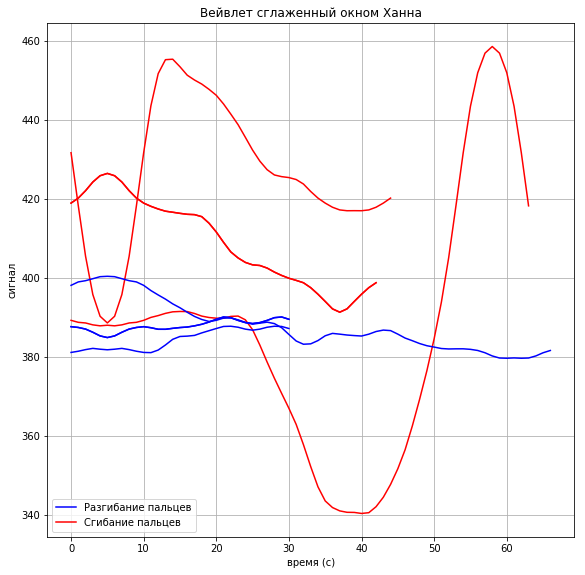

In [449]:
avg = 0
b_5 = []
fig, ax = plt.subplots()
data_1 = []
data_2 = []
for i in range(start, end):
    
    avg += len(batches_regression[i][:-1])
    wavelet = pywt.dwt(batches_regression[i][:-1], 'db1')
    graph_smooth = smooth( np.array(batches_regression[i][:-1]) )
    graph_wavelet = smooth( wavelet[0] )
    
    color = "b"
    
    data_1 = graph_wavelet
    if (euclidean([pb_1_x[i], pb_1_y[i]], [hand_1_4[6][i], hand_1_4[7][i]])) < 200:
        color = "r"
        
        data_2 = graph_wavelet
#     plt.plot(graph_smooth, color)
    ax.plot(graph_wavelet, color)
    
label_1 = "Разгибание пальцев"
label_2 = "Сгибание пальцев"
ax.plot(data_1, "b", label=label_1)
ax.plot(data_2, "r", label=label_2)
print(avg/len(batches_regression))
# hanning
ax.grid()

#  Добавляем подписи к осям:
ax.set_xlabel('время (с)')
ax.set_ylabel('сигнал')
ax.legend()
plt.title("Вейвлет сглаженный окном Ханна")

plt.savefig("wavelet_hanning_smooth_signal.jpg")
plt.show()

In [412]:
# avg = 0
# b_5 = []
# start = 3
# end = 5
# for i in range(start, end):
#     plt.scatter(pb_1_x[i], pb_1_y[i], c="r")
    
#     plt.scatter(hand_1_1[2][i], hand_1_1[3][i], c="g")
#     plt.scatter(hand_1_2[2][i], hand_1_2[3][i], c="g")
#     plt.scatter(hand_1_3[2][i], hand_1_3[3][i], c="g")
#     plt.scatter(hand_1_4[2][i], hand_1_4[3][i], c="g")
    
#     plt.scatter(hand_1_1[4][i], hand_1_1[5][i], c="blue")
#     plt.scatter(hand_1_2[4][i], hand_1_2[5][i], c="blue")
#     plt.scatter(hand_1_3[4][i], hand_1_3[5][i], c="blue")
#     plt.scatter(hand_1_4[4][i], hand_1_4[5][i], c="blue")
    
#     plt.scatter(hand_1_1[6][i], hand_1_1[7][i], c="black")
#     plt.scatter(hand_1_2[6][i], hand_1_2[7][i], c="black")
#     plt.scatter(hand_1_3[6][i], hand_1_3[7][i], c="black")
#     plt.scatter(hand_1_4[6][i], hand_1_4[7][i], c="black")
    
#     plt.scatter(hand_1_1[8][i], hand_1_1[9][i], c="y")
#     plt.scatter(hand_1_2[8][i], hand_1_2[9][i], c="y")
#     plt.scatter(hand_1_3[8][i], hand_1_3[9][i], c="y")
#     plt.scatter(hand_1_4[8][i], hand_1_4[9][i], c="y")
    
#     plt.scatter(hand_1_1[10][i], hand_1_1[11][i], c="pink")
#     plt.scatter(hand_1_2[10][i], hand_1_2[11][i], c="pink")
#     plt.scatter(hand_1_3[10][i], hand_1_3[11][i], c="pink")
#     plt.scatter(hand_1_4[10][i], hand_1_4[11][i], c="pink")
    
# #     plt.scatter(t_1_x[i], t_1_y[i], c="g")
# #     plt.scatter(if_1_x[i], if_1_y[i], c="blue")
# #     plt.scatter(mf_1_x[i], mf_1_y[i], c="black")
# #     plt.scatter(rf_1_x[i], rf_1_y[i], c="y")
# #     plt.scatter(pf_1_x[i], pf_1_y[i], c="pink")
#     avg += len(batches_regression[i][:-1])
# #     plt.plot(batches_regression[i][:-1])
# print(avg/len(batches_regression))
# plt.show()

In [411]:
# avg = 0
# b_5 = []
# for i in range(start, end):
#     avg += len(batches_regression[i][:-1])
#     wavelet = pywt.dwt(batches_regression[i][:-1], 'db1')
#     graph = smooth( wavelet[0] )
#     plt.plot(graph)
# print(avg/len(batches_regression))
# plt.show()

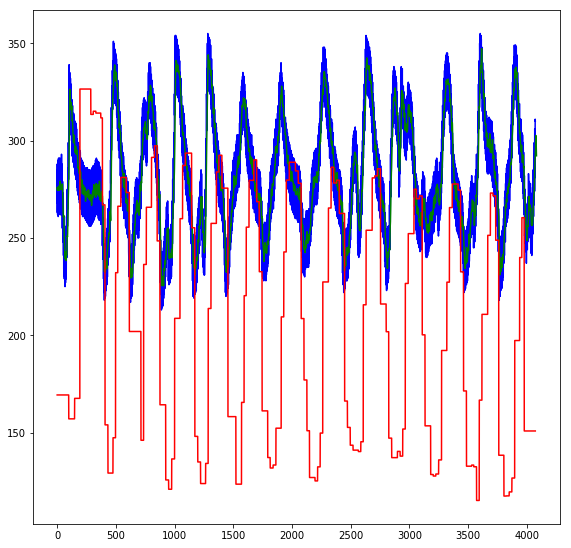

In [406]:
plt.plot(big_signal_1, "b")
wavelet = pywt.dwt(big_signal_1, 'db1')
graph_smooth = smooth( np.array(big_signal_1) )
graph_wavelet = smooth( wavelet[0] )
plt.plot(graph_smooth, "g")
# plt.plot(graph_wavelet, "b")
plt.plot(big_label_1_ground, "r")
plt.show()

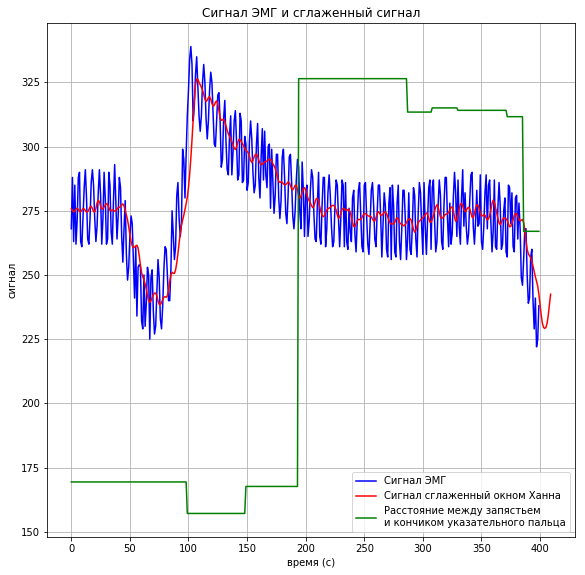

In [454]:
fig, ax = plt.subplots()
ax.plot(big_signal_1[:400], "b", label="Сигнал ЭМГ")
wavelet = pywt.dwt(big_signal_1[:400], 'db1')
graph_smooth = smooth( np.array(big_signal_1[:400]) )
graph_wavelet = smooth( wavelet[0] )
ax.plot(graph_smooth, "r", label="Сигнал сглаженный окном Ханна")
plt.plot(big_label_1_ground[:400], "g", label="Расстояние между запястьем \nи кончиком указательного пальца")

ax.grid()
ax.set_xlabel("время (с)")
ax.set_ylabel("сигнал")
plt.title("Сигнал ЭМГ и сглаженный сигнал")
ax.legend()
plt.savefig("signal_emg.jpg")
plt.show()

In [142]:
bend_index, not_bend_index = get_bend_not_bend_index_lables(big_label_1, 10)

In [146]:
df_bin_1 = create_binary_dataset(big_signal_1, bend_index, not_bend_index, 200)
df_bin_2 = create_binary_dataset(big_signal_1, bend_index, not_bend_index, 200, pass_lower=False)

In [147]:
df_bin_1.describe()

,e_0,e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8,e_9,...,e_191,e_192,e_193,e_194,e_195,e_196,e_197,e_198,e_199,label
count,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,...,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000,26.000000
mean,285.884615,284.500000,280.423077,284.730769,285.384615,283.307692,282.461538,283.653846,283.500000,284.000000,...,95.076923,84.653846,82.461538,82.500000,82.769231,83.576923,83.923077,70.730769,70.346154,0.500000
std,38.387839,34.696686,32.891547,37.940541,43.373796,40.596324,34.173944,34.882594,37.861062,41.673013,...,135.867854,131.746709,128.698479,129.083616,129.542057,130.409255,130.790190,121.340696,120.795345,0.509902
min,222.000000,225.000000,228.000000,222.000000,222.000000,218.000000,225.000000,232.000000,227.000000,219.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,256.000000,254.000000,254.000000,257.500000,246.500000,253.750000,253.250000,250.500000,252.750000,246.250000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
50%,282.500000,279.000000,274.500000,285.000000,287.000000,280.000000,281.500000,287.500000,280.000000,278.500000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.500000
75%,322.750000,311.750000,307.750000,318.750000,328.250000,314.750000,315.000000,315.250000,317.000000,322.750000,...,257.750000,253.000000,238.000000,236.000000,246.250000,241.500000,246.250000,176.000000,174.500000,1.000000
max,344.000000,353.000000,354.000000,342.000000,350.000000,352.000000,352.000000,355.000000,340.000000,348.000000,...,344.000000,319.000000,318.000000,333.000000,345.000000,339.000000,322.000000,317.000000,323.000000,1.000000


In [148]:
df_bin_2.describe()

,e_0,e_1,e_2,e_3,e_4,e_5,e_6,e_7,e_8,e_9,...,e_191,e_192,e_193,e_194,e_195,e_196,e_197,e_198,e_199,label
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0000,7.000000
mean,300.857143,295.285714,291.000000,303.714286,304.857143,299.142857,295.857143,299.000000,297.714286,298.857143,...,278.428571,272.571429,267.000000,266.142857,268.000000,272.428571,273.142857,265.428571,264.0000,0.285714
std,28.626495,21.982677,25.922963,30.982330,36.992921,26.554526,19.143568,27.525746,34.855484,35.343215,...,32.887977,23.971213,31.596413,35.788399,37.474436,33.120271,30.443547,28.803108,30.4412,0.487950
min,268.000000,270.000000,263.000000,256.000000,255.000000,267.000000,273.000000,261.000000,249.000000,258.000000,...,236.000000,247.000000,238.000000,227.000000,223.000000,240.000000,232.000000,235.000000,233.0000,0.000000
25%,278.000000,279.000000,269.500000,286.000000,279.500000,278.500000,281.500000,279.000000,269.000000,273.000000,...,265.500000,260.000000,241.000000,245.500000,255.500000,252.500000,251.500000,243.000000,244.5000,0.000000
50%,294.000000,288.000000,281.000000,296.000000,300.000000,294.000000,288.000000,300.000000,311.000000,287.000000,...,275.000000,265.000000,254.000000,259.000000,259.000000,268.000000,280.000000,264.000000,260.0000,0.000000
75%,322.500000,310.500000,316.000000,332.000000,336.500000,321.500000,314.000000,321.000000,325.500000,328.500000,...,281.500000,278.500000,288.500000,276.500000,269.000000,277.500000,287.500000,278.000000,271.5000,0.500000
max,343.000000,330.000000,322.000000,338.000000,347.000000,333.000000,319.000000,332.000000,335.000000,344.000000,...,344.000000,319.000000,318.000000,333.000000,345.000000,339.000000,322.000000,317.000000,323.0000,1.000000


In [64]:
for each in bend_index:
    d = auto_norm( big_signal_1[each[0] : each[1]], 30)
    d = auto_local_avg(d[0],d[1])
    print(d[0], d[-1], d[-1]-d[0], each)

275.5 254.5 -21.0 (183, 417)
311.0 259.0 -52.0 (487, 723)
307.5 319.0 11.5 (726, 885)
335.5 319.0 -16.5 (990, 1182)
324.5 260.0 -64.5 (1276, 1464)
313.5 274.0 -39.5 (1582, 1755)
316.5 245.5 -71.0 (1898, 2112)
332.5 271.0 -61.5 (2252, 2458)
338.5 267.0 -71.5 (2597, 2834)
310.0 263.0 -47.0 (2955, 3143)
289.5 268.0 -21.5 (3309, 3471)
303.0 261.0 -42.0 (3608, 3771)
307.0 266.5 -40.5 (3929, 3988)


In [65]:
for each in bend_index:
    d = auto_norm( big_signal_1[each[0] : each[1]], 30)
    d = auto_local_avg(d[0],d[1])
    print(d[0], d[-1], d[-1]-d[0], each)

275.5 254.5 -21.0 (183, 417)
311.0 259.0 -52.0 (487, 723)
307.5 319.0 11.5 (726, 885)
335.5 319.0 -16.5 (990, 1182)
324.5 260.0 -64.5 (1276, 1464)
313.5 274.0 -39.5 (1582, 1755)
316.5 245.5 -71.0 (1898, 2112)
332.5 271.0 -61.5 (2252, 2458)
338.5 267.0 -71.5 (2597, 2834)
310.0 263.0 -47.0 (2955, 3143)
289.5 268.0 -21.5 (3309, 3471)
303.0 261.0 -42.0 (3608, 3771)
307.0 266.5 -40.5 (3929, 3988)


In [66]:
for each in not_bend_index:
    d = auto_norm( big_signal_1[each[0] : each[1]], 30)
    d = auto_local_avg(d[0],d[1])
    print(d[0], d[-1], d[-1]-d[0])

277.0 297.0 20.0
232.5 331.0 98.5
274.0 307.5 33.5
268.5 326.0 57.5
233.0 340.0 107.0
248.0 315.0 67.0
244.0 311.0 67.0
263.5 285.0 21.5
290.5 285.5 -5.0
304.5 324.5 20.0
260.5 303.0 42.5
238.0 265.0 27.0
234.5 315.5 81.0


In [166]:
arg = '--hi'

In [167]:
if arg[0] == '-' or arg[0:2] == '--':
    print("+")

+


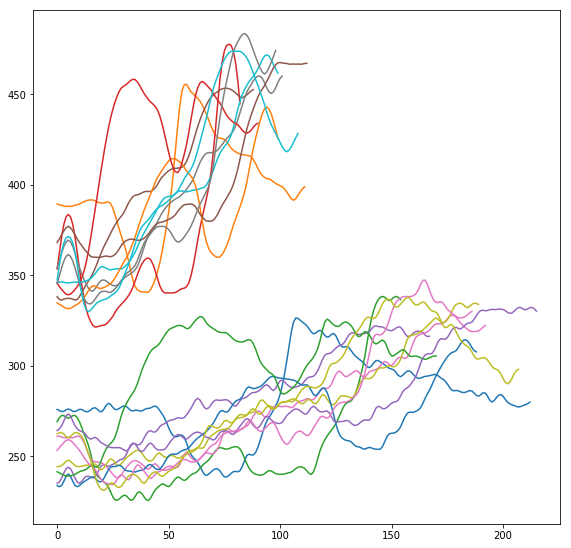

In [463]:
for each in bend_index:
    d = auto_norm( big_signal_1[each[0] : each[1]], 30)
    d = auto_local_avg(d[0],d[1])
#     plt.plot(d) 
    d = big_signal_1[each[0] : each[1]]
    wavelet = pywt.dwt(d, 'db1')
    graph_wavelet = smooth( wavelet[0] )
    d = graph_smooth = smooth( np.array(d) )
    
    if len(d) > 150:
        plt.plot(d) 
        plt.plot(graph_wavelet)
plt.show()

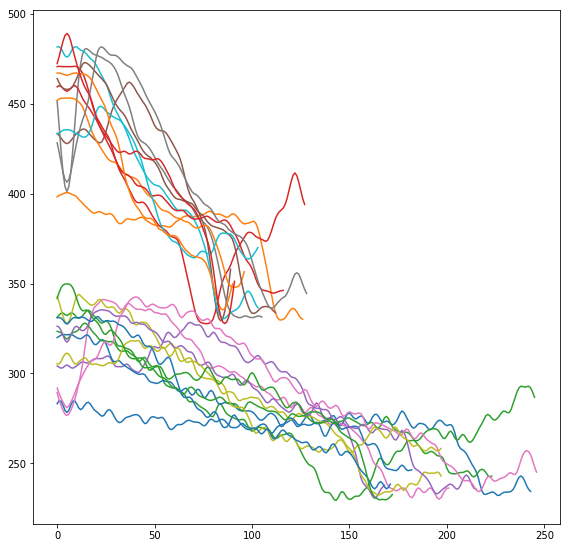

In [465]:
for each in not_bend_index:
    d = auto_norm( big_signal_1[each[0] : each[1]], 30)
    d = auto_local_avg(d[0],d[1])
#     plt.plot(d) 
    d = big_signal_1[each[0] : each[1]]

    wavelet = pywt.dwt(d, 'db1')
    graph_wavelet = smooth( wavelet[0] )
    d = graph_smooth = smooth( np.array(d) )
    if len(d) > 150:
        plt.plot(d)   
        plt.plot(graph_wavelet)
plt.show()

In [69]:
start = 0
end = -1

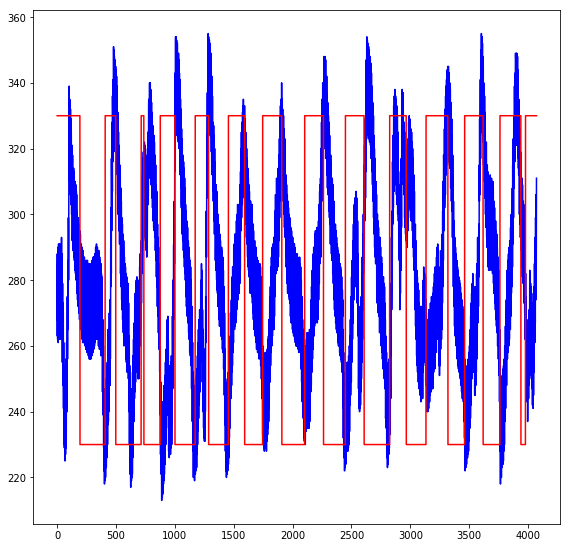

In [174]:
plt.plot(big_signal_1[start:end], c="b")
plt.plot(big_label_1[start:end], c="r")
# plt.plot(big_label_1_ground[start:end], c="g")
# plt.rcParams['figure.figsize'] = [24/2.54, 24/2.54]
plt.show()

In [71]:
bend_ds2 = is_bend(bending_dist_b2_if2, bias=20)
big_signal_2, big_label_2 = concat_signals_lables(signals_2, bend_ds2, 400)
big_signal_2, big_label_2_ground = concat_signals_lables_ground(signals_2, bending_dist_b2_if2)


In [72]:
start = 0
end = -1

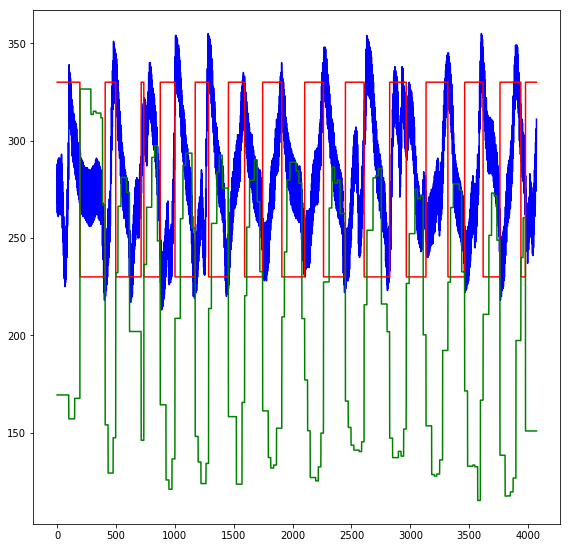

In [175]:
plt.plot(big_signal_1[start:end], c="b")
plt.plot(big_label_1[start:end], c="r")
plt.plot(big_label_1_ground[start:end], c="g")
plt.rcParams['figure.figsize'] = [24/2.54, 24/2.54]
plt.show()

In [74]:
# big_signal = concat_signals(signals)
bend_base_index = is_bend(bending_dist_base_indexFinger, bias=10)
big_signal, big_label = concat_signals_lables(signals, bend_base_index)
big_signal, big_label_ground = concat_signals_lables_ground(signals, bending_dist_base_indexFinger)

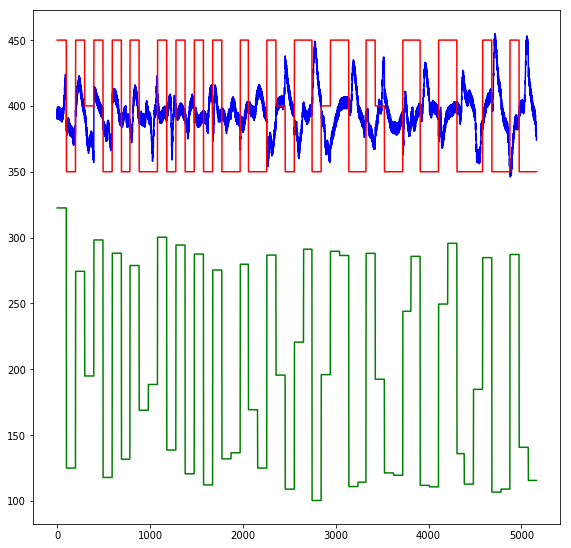

In [75]:
plt.plot(big_signal, c="b")
plt.plot(big_label, c="r")
plt.plot(big_label_ground, c="g")
plt.rcParams['figure.figsize'] = [24/2.54, 24/2.54]
plt.show()

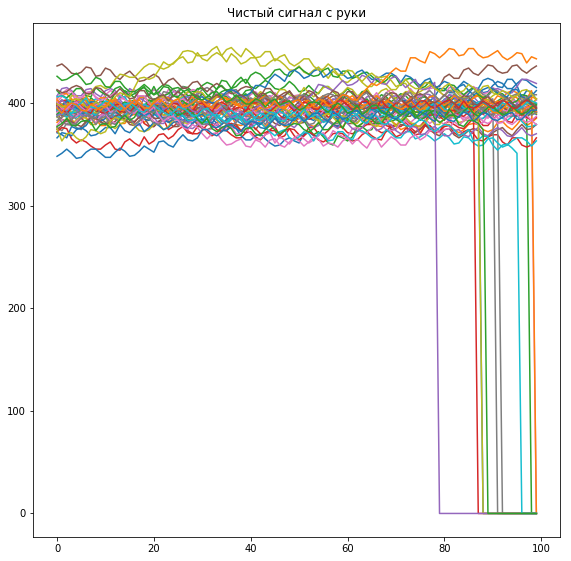

In [76]:
for i, s in enumerate(signals):
    plt.plot(s)
plt.title("Чистый сигнал с руки")
plt.show()

In [77]:
def get_log_signals(data):
    result = []
    for res in data:
        tmp = []
        for r in res:
            tmp.append(np.log(r))
        result.append(tmp)
    return result

In [78]:
signals_log = get_log_signals(signals)

/Users/nikita/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


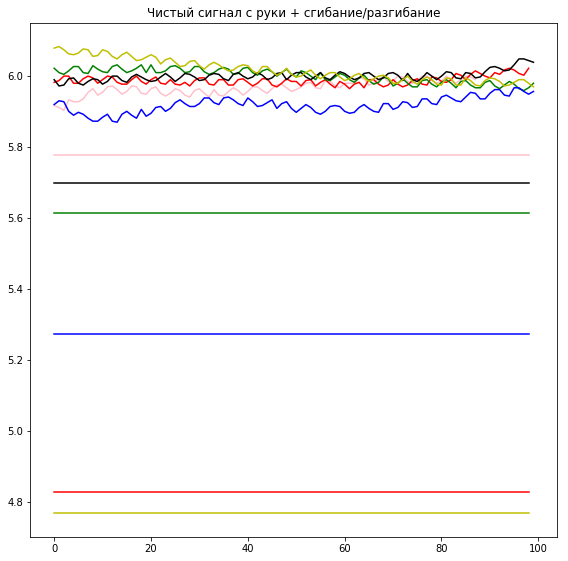

In [79]:
colors = ['r', 'g', "b", "black", "y", "pink"]
for i, s in enumerate(signals_log[20:26]):
    plt.plot(s, c=colors[(i % len(colors)) -1])
    plt.plot([np.log(bending_dist_base_indexFinger[i]) for _ in range(len(s)-1)], c=colors[(i % len(colors)) -1] )
plt.title("Чистый сигнал с руки + сгибание/разгибание")
plt.show()

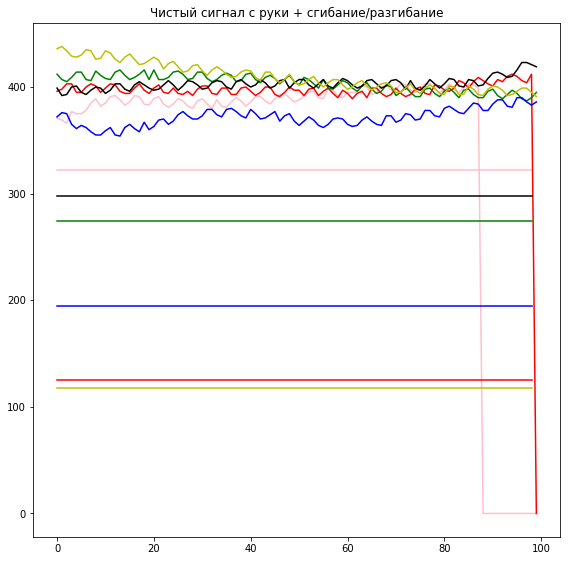

In [80]:
colors = ['r', 'g', "b", "black", "y", "pink"]
for i, s in enumerate(signals[20:26]):
    plt.plot(s, c=colors[(i % len(colors)) -1])
    plt.plot([bending_dist_base_indexFinger[i] for _ in range(len(s)-1)], c=colors[(i % len(colors)) -1] )
plt.title("Чистый сигнал с руки + сгибание/разгибание")
plt.show()

In [81]:
def is_bend(data_bend, threshold=200, bias=25):
    result = []
    for d in data_bend:
#         result.append(d > threshold)
        if d > (threshold + bias):
            result.append(-1)
        elif d < (threshold - bias):
            result.append(1)
        else:
            result.append(0)
    return result

In [82]:
is_bend_base_indexFinger = is_bend(bending_dist_base_indexFinger, bias=50)

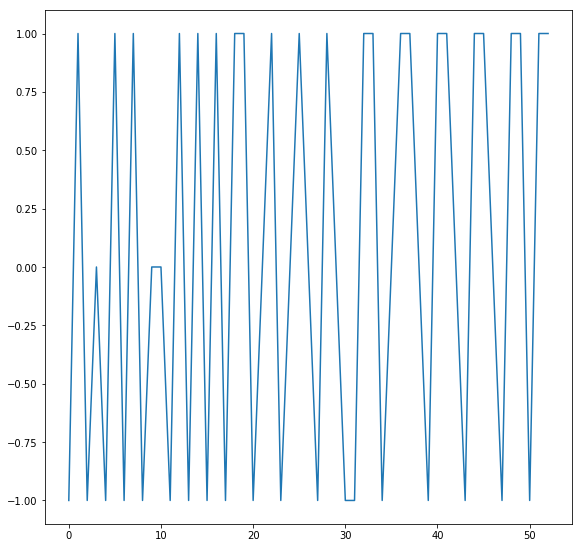

In [83]:
plt.plot(is_bend_base_indexFinger)
plt.show()

In [84]:
# for i in range(len(is_bend_base_indexFinger)):
#     diff_start_end = signals[i][-1] - signals[i][0]
#     diff_max_min = max(signals[i]) - min(signals[i])
#     print("{:2d}".format(is_bend_base_indexFinger[i]),
#           "{:3.0f}".format(diff_start_end), 
#           "{:3.0f}".format(diff_max_min),
#           "{:3.0f}".format(np.average(signals[i])))

In [85]:
def auto_norm(data, threshold=30):
        res_min = np.array(data)
        res_max = np.array(data)
        # удивительно, но медиана уровня дом дереа работает и очень даже неплохо
#         threshold = int(np.median(res))
#         print(threshold)
        cnt = len(res_min)
        indexes = [i for i in range(len(data))]
        indexes_max = np.array(indexes)
        indexes_min = np.array(indexes)
        def f(res_min, res_max, indexes_min, indexes_max):
            while len(indexes_min) > threshold:
                minInd = argrelmin(res_min)
                res_min = res_min[minInd]
                indexes_min = indexes_min[minInd]
            while len(indexes_max) > threshold:
                maxInd = argrelmax(res_max)
                res_max = res_max[maxInd]
                indexes_max = indexes_max[maxInd]
            return res_min, res_max, indexes_min, indexes_max
        res_min, res_max, indexes_min, indexes_max = f(res_min, res_max, indexes_min, indexes_max)
        return res_min, res_max, indexes_min, indexes_max

In [86]:
def auto_local_avg(data_max, data_min):
    res = []
#     print("data_max, data_min: ", data_max, data_min)
    length = min(len(list(data_max)), len(list(data_min)))
    for i in range(length):
        t = (data_max[i] + data_min[i])/2
        res.append(t)
    return res

In [87]:
## res_signal_min_0, res_signal_max_0, _, _ = auto_norm(signals[0])
res_signal_min_1, res_signal_max_1, _, _ = auto_norm(signals[1])

In [89]:
# len(res_signal_min_0)

In [90]:
plt.plot(res_signal_min_0)
plt.plot(res_signal_max_0)
plt.show()

NameError: name 'res_signal_min_0' is not defined

# Чем меньше расстояние – тем сильнее сгиб

In [92]:
# colors = ['r', 'g', "b", "black", "y", "cyan"]
# for i, s in enumerate(signals[0:3]):
#     res_min, res_max, _, _ = auto_norm(s, 20)
#     plt.plot(res_min, c=colors[(i % len(colors)) -1] )
#     plt.plot(res_max, c=colors[(i % len(colors)) -1] )
# #     plt.plot([bending_dist_base_indexFinger[i] for _ in range(len(res))], c=colors[(i % len(colors)) -1] )
# plt.show()

# for i, s in enumerate([i for i in range(0, 3)]):
#     plt.plot([bending_dist_base_indexFinger[s] for _ in range(2)], c=colors[(i % len(colors)) -1] )
# plt.show()

In [ ]:
colors = ['r', 'g', "b", "black", "y", "cyan"]
step_size= 3
for step in range(0, len(signals) -step_size, step_size):
    print(step, step+step_size)
    for i, s in enumerate(signals[step:(step+step_size)]):
        res_min, res_max, _, _ = auto_norm(s, 70)
        plt.plot(res_min, c=colors[(i % len(colors)) -1] )
#         plt.plot(res_max, c=colors[(i % len(colors)) -1] )
    #     plt.plot([bending_dist_base_indexFinger[i] for _ in range(len(res))], c=colors[(i % len(colors)) -1] )
    plt.show()

    for i, s in enumerate([i for i in range(step, step+step_size)]):
        plt.plot([bending_dist_base_indexFinger[s] for _ in range(2)], c=colors[(i % len(colors)) -1] )
    plt.show()